In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot
from sklearn.model_selection import train_test_split, KFold, GridSearchCV,\
cross_val_score, RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE, RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.metrics import f1_score, confusion_matrix, recall_score, precision_score, accuracy_score
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, f1_score, recall_score, confusion_matrix, classification_report, make_scorer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn import tree 
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek

In [75]:
df_final = pd.read_csv('Final_NBA_Seasons1-3_1977_final.csv', index_col = 0)
df_final.set_index('Player', inplace = True)

In [168]:
list(df_final.columns)

['G',
 'GS',
 'MP',
 'FG',
 'FGA',
 '2P',
 '2PA',
 '3P',
 '3PA',
 'FT',
 'FTA',
 'ORB',
 'DRB',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS',
 'season_count',
 'roy',
 'all_rookie_1',
 'all_rookie_2',
 'WS_1',
 'G_1',
 'GS_1',
 'MP_1',
 'FG_1',
 'FGA_1',
 '2P_1',
 '2PA_1',
 '3P_1',
 '3PA_1',
 'FT_1',
 'FTA_1',
 'ORB_1',
 'DRB_1',
 'TRB_1',
 'AST_1',
 'STL_1',
 'BLK_1',
 'TOV_1',
 'PF_1',
 'PTS_1',
 'FG%_1',
 '2P%_1',
 '3P%_1',
 'eFG%_1',
 'FT%_1',
 'TS%_1',
 'ppg_1',
 'apg_1',
 'rpg_1',
 'spg_1',
 'bpg_1',
 'tpg_1',
 'ftpg_1',
 'PER_1',
 '3PAr_1',
 'FTr_1',
 'ORB%_1',
 'DRB%_1',
 'TRB%_1',
 'AST%_1',
 'STL%_1',
 'BLK%_1',
 'TOV%_1',
 'USG%_1',
 'ORtg_1',
 'DRtg_1',
 'OWS_1',
 'DWS_1',
 'WS/48_1',
 'OBPM_1',
 'DBPM_1',
 'BPM_1',
 'VORP_1',
 'WS_2',
 'G_2',
 'GS_2',
 'MP_2',
 'FG_2',
 'FGA_2',
 '2P_2',
 '2PA_2',
 '3P_2',
 '3PA_2',
 'FT_2',
 'FTA_2',
 'ORB_2',
 'DRB_2',
 'TRB_2',
 'AST_2',
 'STL_2',
 'BLK_2',
 'TOV_2',
 'PF_2',
 'PTS_2',
 'FG%_2',
 '2P%_2',
 '3P%_2',
 'eFG%_2',
 

In [77]:
#creating features that multiple statistical totals by season over season difference
df_final['G_1-2%'] = ((df_final['GS_2'] - df_final['GS_1'])/df_final['GS_1'])/100 #games played year 2 v 1 
df_final['G_2-3%'] = ((df_final['GS_3'] - df_final['GS_2'])/df_final['GS_2'])/100 #games played year 3 v 2
df_final['GS_1-2%'] = ((df_final['GS_2'] - df_final['GS_1'])/df_final['GS_1'])/100 #games started year 2 v 1 
df_final['GS_2-3%'] = ((df_final['GS_3'] - df_final['GS_2'])/df_final['GS_2'])/100 #games started year 3 v 2
df_final['MP_1-2%'] = ((df_final['MP_2'] - df_final['MP_1'])/df_final['MP_1'])/100 #minutes played 2 v 1 
df_final['MP_2-3%'] = ((df_final['MP_3'] - df_final['MP_2'])/df_final['MP_2'])/100 #minutes played 3 v 2
df_final['PPG_1-2%'] = ((df_final['ppg_2'] - df_final['ppg_1'])/df_final['ppg_1'])/100 #ppg 2 v 1 
df_final['PPG_2-3%'] = ((df_final['ppg_3'] - df_final['ppg_2'])/df_final['ppg_2'])/100 #ppg 3 v 2
# df_final['APG_1-2'] = df_final['apg_2'] - df_final['apg_1'] #apg 2 v 1 
# df_final['APG_2-3'] = df_final['apg_3'] - df_final['apg_2'] #apg 3 v 2
# df_final['RPG_1-2'] = df_final['rpg_2'] - df_final['rpg_1'] #rpg 2 v 1 
# df_final['RPG_2-3'] = df_final['rpg_3'] - df_final['rpg_2'] #rpg 3 v 2
# df_final['SPG_1-2'] = df_final['spg_2'] - df_final['spg_1'] #spg 2 v 1 
# df_final['SPG_2-3'] = df_final['spg_3'] - df_final['spg_2'] #spg 3 v 2
# df_final['BPG_1-2'] = df_final['bpg_2'] - df_final['bpg_1'] #bpg 2 v 1 
# df_final['BPG_2-3'] = df_final['bpg_3'] - df_final['bpg_2'] #bpg 3 v 2
df_final['WS_1-2%'] = ((df_final['WS_2'] - df_final['WS_1'])/df_final['WS_1'])/100 #wins shares season 2 v 1 
df_final['WS_2-3%'] = ((df_final['WS_3'] - df_final['WS_2'])/df_final['WS_2'])/100 #wins shares season 3 v 2
# df_final['OWS_1-2'] = df_final['OWS_2'] - df_final['OWS_1'] #offensive wins shares season 2 v 1 
# df_final['OWS_2-3'] = df_final['OWS_3'] - df_final['OWS_2'] #offensive wins shares season 3 v 2
# df_final['DWS_1-2'] = df_final['DWS_2'] - df_final['DWS_1'] #defensive wins shares season 2 v 1 
# df_final['DWS_2-3'] = df_final['DWS_3'] - df_final['DWS_2'] #defensive wins shares season 3 v 2
df_final['PER_1-2%'] = ((df_final['PER_2'] - df_final['PER_1'])/df_final['PER_1'])/100 #PER 2 v 1 
df_final['PER_2-3%'] = ((df_final['PER_3'] - df_final['PER_2'])/df_final['PER_2'])/100 #PER 3 v 3 
df_final['USG_1-2%'] = ((df_final['USG%_2'] - df_final['USG%_1'])/df_final['USG%_1'])/100 #USG% 2 v 1 
df_final['USG_2-3%'] = ((df_final['USG%_3'] - df_final['USG%_2'])/df_final['USG%_2'])/100 #USG% 3 v 2 
df_final['VORP_1-2%'] = ((df_final['VORP_2'] - df_final['VORP_1'])/df_final['VORP_1'])/100 #value over replacement player diff year 1 v 2 
df_final['VORP_2-3%'] = ((df_final['VORP_3'] - df_final['VORP_2'])/df_final['VORP_2'])/100 #value over replacement player diff year 2 v 3

In [78]:
df_final.head()

,G,GS,MP,FG,FGA,2P,2PA,3P,3PA,FT,...,PPG_1-2%,PPG_2-3%,WS_1-2%,WS_2-3%,PER_1-2%,PER_2-3%,USG_1-2%,USG_2-3%,VORP_1-2%,VORP_2-3%
Player,,,,,,,,,,,,,,,,,,,,,
A.C. Green\greenac01,243,137.0,6418.0,847,1615,846,1602,1.0,13.0,615,...,0.006974,0.000595,0.013030,0.000395,0.003305,-0.000764,0.000000,0.000000,0.075000,-0.001176
A.J. Price\priceaj01,150,3.0,2228.0,318,848,191,437,127.0,411.0,142,...,-0.001177,-0.003949,-0.007500,0.013333,-0.002357,0.000748,0.000000,-0.002203,-0.016667,-0.015000
Aaron Brooks\brookaa01,213,117.0,5525.0,984,2339,626,1396,358.0,943.0,436,...,0.011588,0.007504,0.015714,0.005278,-0.000153,0.002403,0.000505,0.001223,0.010000,0.021667
Aaron Gordon\gordoaa01,205,117.0,4958.0,760,1652,628,1195,132.0,457.0,329,...,0.007829,0.003818,0.044000,-0.003148,0.004912,-0.001471,0.001161,0.001618,-0.080000,-0.005714
Aaron Gray\grayaa01,149,19.0,1639.0,226,453,226,451,0.0,2.0,110,...,-0.001851,-0.000714,0.006250,-0.003077,-0.001727,0.004435,-0.003409,0.001310,-0.000000,-0.015000


In [79]:
cols = ['MP','FG','2P','FT','TRB','AST','STL','TOV','PTS','roy','all_rookie_1','all_rookie_2','WS_1','GS_1','MP_1','PTS_1','ppg_1','apg_1','rpg_1','spg_1','bpg_1',
        'tpg_1','ftpg_1','PER_1','WS/48_1','VORP_1','WS_2','GS_2','MP_2','ppg_2','apg_2','rpg_2','spg_2','bpg_2','tpg_2','ftpg_2','PER_2','USG%_2',
        'ORtg_2','DRtg_2','OWS_2','DWS_2','WS/48_2','VORP_2','WS_3','GS_3','MP_3','PTS_3','TS%_3','ppg_3','apg_3','rpg_3','spg_3','bpg_3','tpg_3','ftpg_3','PER_3','USG%_3',
        'ORtg_3','DRtg_3','OWS_3','DWS_3','WS/48_3','VORP_3','target',]

df = df_final[cols]

In [80]:
df = df.fillna(0)
df.head()

,MP,FG,2P,FT,TRB,AST,STL,TOV,PTS,roy,...,ftpg_3,PER_3,USG%_3,ORtg_3,DRtg_3,OWS_3,DWS_3,WS/48_3,VORP_3,target
Player,,,,,,,,,,,,,,,,,,,,,
A.C. Green\greenac01,6418.0,847,846,615,1706.0,231,206.0,321.0,2310,0.0,...,3.573171,14.5,14.7,119.0,106.0,4.5,3.4,0.144,1.5,0
A.J. Price\priceaj01,2228.0,318,191,142,221.0,303,84.0,144.0,905,0.0,...,0.636364,11.5,17.7,100.0,106.0,0.2,0.5,0.063,0.1,0
Aaron Brooks\brookaa01,5525.0,984,626,436,428.0,759,128.0,401.0,2762,0.0,...,2.987805,16.0,25.7,108.0,112.0,3.9,1.6,0.091,1.9,0
Aaron Gordon\gordoaa01,4958.0,760,628,329,1081.0,311,145.0,193.0,1981,0.0,...,1.950000,14.5,20.1,107.0,111.0,2.0,1.7,0.077,0.6,0
Aaron Gray\grayaa01,1639.0,226,226,110,494.0,109,44.0,115.0,562,0.0,...,0.625000,16.6,16.4,115.0,106.0,0.5,0.4,0.142,0.1,0


In [161]:
df.sort_values(by = 'PER_3', ascending = False)

,MP,FG,2P,FT,TRB,AST,STL,TOV,PTS,roy,...,ftpg_3,PER_3,USG%_3,ORtg_3,DRtg_3,OWS_3,DWS_3,WS/48_3,VORP_3,target
Player,,,,,,,,,,,,,,,,,,,,,
DeAndre Liggins\liggide01,406.0,34,27,18,69.0,20,24.0,24.0,93,0.0,...,0.000000,129.1,47.8,205.0,116.0,0.0,0.0,2.123,0.0,0
Ben Davis\davisbe01,132.0,19,19,12,44.0,3,5.0,4.0,50,0.0,...,0.375000,34.4,47.2,107.0,103.0,0.1,0.0,0.238,0.0,0
Anthony Davis\davisan02,6659.0,1513,1510,888,1891.0,317,264.0,293.0,3917,0.0,...,5.455882,30.8,27.8,122.0,100.0,9.9,4.2,0.274,6.7,1
Michael Jordan\jordami01,6876.0,2085,2061,1568,1028.0,911,469.0,608.0,5762,1.0,...,10.158537,29.8,38.3,117.0,104.0,11.9,5.0,0.247,10.6,1
Shaquille O'Neal\onealsh01,9218.0,2616,2616,1353,3095.0,561,209.0,733.0,6585,1.0,...,5.759494,28.6,31.9,118.0,104.0,9.6,4.4,0.230,5.7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Damone Brown\brownda02,199.0,20,20,14,24.0,5,4.0,16.0,54,0.0,...,0.333333,-4.3,32.8,45.0,90.0,-0.2,0.0,-0.345,-0.1,0
Anthony Miller\millean01,664.0,85,83,53,184.0,39,24.0,46.0,225,0.0,...,0.000000,-4.6,16.9,30.0,97.0,-0.1,0.0,-0.195,0.0,0
Darius Miller\milleda01,1460.0,118,71,37,131.0,89,42.0,46.0,320,0.0,...,0.000000,-5.1,8.5,42.0,113.0,-0.1,0.0,-0.122,-0.1,0


In [165]:
df['PER_3'] = np.where(df.PER_3 > 34, 0, df.PER_3)

In [166]:
df.sort_values(by = 'PER_3', ascending = False)

,MP,FG,2P,FT,TRB,AST,STL,TOV,PTS,roy,...,ftpg_3,PER_3,USG%_3,ORtg_3,DRtg_3,OWS_3,DWS_3,WS/48_3,VORP_3,target
Player,,,,,,,,,,,,,,,,,,,,,
Anthony Davis\davisan02,6659.0,1513,1510,888,1891.0,317,264.0,293.0,3917,0.0,...,5.455882,30.8,27.8,122.0,100.0,9.9,4.2,0.274,6.7,1
Michael Jordan\jordami01,6876.0,2085,2061,1568,1028.0,911,469.0,608.0,5762,1.0,...,10.158537,29.8,38.3,117.0,104.0,11.9,5.0,0.247,10.6,1
Shaquille O'Neal\onealsh01,9218.0,2616,2616,1353,3095.0,561,209.0,733.0,6585,1.0,...,5.759494,28.6,31.9,118.0,104.0,9.6,4.4,0.230,5.7,1
Chris Paul\paulch01,8167.0,1418,1226,1018,1001.0,2105,510.0,545.0,4046,1.0,...,4.150000,28.3,25.7,125.0,103.0,13.2,4.6,0.284,9.3,1
LeBron James\jamesle01,9871.0,2292,1994,1425,1576.0,1563,430.0,795.0,6307,1.0,...,7.607595,28.1,33.6,115.0,104.0,12.0,4.3,0.232,9.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Damone Brown\brownda02,199.0,20,20,14,24.0,5,4.0,16.0,54,0.0,...,0.333333,-4.3,32.8,45.0,90.0,-0.2,0.0,-0.345,-0.1,0
Anthony Miller\millean01,664.0,85,83,53,184.0,39,24.0,46.0,225,0.0,...,0.000000,-4.6,16.9,30.0,97.0,-0.1,0.0,-0.195,0.0,0
Darius Miller\milleda01,1460.0,118,71,37,131.0,89,42.0,46.0,320,0.0,...,0.000000,-5.1,8.5,42.0,113.0,-0.1,0.0,-0.122,-0.1,0


In [9]:
all_nba = df[df['target'] == 1]
all_nba.index.to_list()

['Al Horford\\horfoal01',
 'Allen Iverson\\iversal01',
 "Amar'e Stoudemire\\stoudam01",
 'Andre Drummond\\drumman01',
 'Andrew Bogut\\bogutan01',
 'Anfernee Hardaway\\hardaan01',
 'Anthony Davis\\davisan02',
 'Antonio McDyess\\mcdyean01',
 'Baron Davis\\davisba01',
 'Bernard King\\kingbe01',
 'Blake Griffin\\griffbl01',
 'Brad Daugherty\\daughbr01',
 'Brandon Roy\\roybr01',
 'Carlos Boozer\\boozeca01',
 'Carmelo Anthony\\anthoca01',
 'Charles Barkley\\barklch01',
 'Chris Bosh\\boshch01',
 'Chris Mullin\\mullich01',
 'Chris Paul\\paulch01',
 'Chris Webber\\webbech01',
 'Clyde Drexler\\drexlcl01',
 'Dale Ellis\\ellisda01',
 'Damian Lillard\\lillada01',
 'David Robinson\\robinda01',
 'DeMarcus Cousins\\couside01',
 'Dennis Rodman\\rodmade01',
 'Deron Williams\\willide01',
 'Derrick Coleman\\colemde01',
 'Dirk Nowitzki\\nowitdi01',
 'Dominique Wilkins\\wilkido01',
 'Draymond Green\\greendr01',
 'Dwight Howard\\howardw01',
 'Dwyane Wade\\wadedw01',
 'Eddie Jones\\jonesed02',
 'Fat Lever\\le

In [48]:
y.value_counts()

0    1183
1      90
Name: target, dtype: int64

In [81]:
X = df.drop(columns = 'target')
y = df['target']

X_train, X_test, y_train, y_test =  train_test_split(X, y, train_size= .8, random_state= 42)

In [62]:
X

,MP,FG,2P,FT,TRB,AST,STL,TOV,PTS,roy,...,tpg_3,ftpg_3,PER_3,USG%_3,ORtg_3,DRtg_3,OWS_3,DWS_3,WS/48_3,VORP_3
Player,,,,,,,,,,,,,,,,,,,,,
A.C. Green\greenac01,6418.0,847,846,615,1706.0,231,206.0,321.0,2310,0.0,...,1.463415,3.573171,14.5,14.7,119.0,106.0,4.5,3.4,0.144,1.5
A.J. Price\priceaj01,2228.0,318,191,142,221.0,303,84.0,144.0,905,0.0,...,0.727273,0.636364,11.5,17.7,100.0,106.0,0.2,0.5,0.063,0.1
Aaron Brooks\brookaa01,5525.0,984,626,436,428.0,759,128.0,401.0,2762,0.0,...,2.829268,2.987805,16.0,25.7,108.0,112.0,3.9,1.6,0.091,1.9
Aaron Gordon\gordoaa01,4958.0,760,628,329,1081.0,311,145.0,193.0,1981,0.0,...,1.112500,1.950000,14.5,20.1,107.0,111.0,2.0,1.7,0.077,0.6
Aaron Gray\grayaa01,1639.0,226,226,110,494.0,109,44.0,115.0,562,0.0,...,0.562500,0.625000,16.6,16.4,115.0,106.0,0.5,0.4,0.142,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zaza Pachulia\pachuza01,4513.0,535,535,493,1165.0,202,154.0,284.0,1563,0.0,...,2.307692,3.807692,15.0,19.2,106.0,110.0,2.5,1.4,0.077,-0.1
Zydrunas Ilgauskas\ilgauzy01,3166.0,597,596,301,927.0,93,71.0,215.0,1496,0.0,...,2.500000,2.208333,16.0,24.1,96.0,103.0,0.1,0.7,0.056,0.0
Ömer Aşık\asikom01,4424.0,489,489,288,1612.0,139,96.0,305.0,1266,0.0,...,2.109756,2.048780,14.9,16.3,105.0,103.0,2.0,3.5,0.108,0.3


In [90]:
nba_scaled = StandardScaler()
# X_train_sc = ss.fit_transform(X_train)
# X_test_sc = ss.transform(X_test)

nba_scaled.fit(X_train)
X_train_sc = pd.DataFrame(nba_scaled.transform(X_train), index = X_train.index, columns = X_train.columns)
X_test_sc = pd.DataFrame(nba_scaled.transform(X_test), index = X_test.index, columns = X_test.columns)

In [91]:
#create tomek links
# t1 = TomekLinks()
# X_train_sc_t1, X_test_sc_t1 = t1.fit_resample(X_train_sc,X_test_sc)
# #remove tomek links
# t1 = TomekLinks()
# X_train_sc_rs, X_test_sc_rs = t1.fit_sample()

In [92]:
smt = SMOTETomek(tomek=TomekLinks(sampling_strategy='not majority'))
X_train_smt, y_train_smt = smt.fit_sample(X_train_sc, y_train)

#### RFE Logistic Regression Model

In [106]:
rfe_lr = RFECV(estimator=LogisticRegression(class_weight = 'balanced', max_iter = 1000), step = 1, cv = 3, scoring = 'precision', n_jobs = -1, verbose = 1)
rfe_lr.fit(X_train_sc, y_train)

Fitting estimator with 64 features.
Fitting estimator with 63 features.
Fitting estimator with 62 features.
Fitting estimator with 61 features.
Fitting estimator with 60 features.
Fitting estimator with 59 features.
Fitting estimator with 58 features.
Fitting estimator with 57 features.
Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 fe

RFECV(cv=3,
      estimator=LogisticRegression(class_weight='balanced', max_iter=1000),
      n_jobs=-1, scoring='precision', verbose=1)

In [94]:
rfe_lr = RFECV(estimator=LogisticRegression(class_weight = 'balanced', max_iter = 1000), step = 1, cv = 3, scoring = 'f1', n_jobs = -1, verbose = 1)
rfe_lr.fit(X_train_sc, y_train)
# X_train_sc.columns[rfe_lr.get_support()]

Fitting estimator with 64 features.
Fitting estimator with 63 features.
Fitting estimator with 62 features.
Fitting estimator with 61 features.
Fitting estimator with 60 features.
Fitting estimator with 59 features.
Fitting estimator with 58 features.
Fitting estimator with 57 features.
Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 fe

RFECV(cv=3,
      estimator=LogisticRegression(class_weight='balanced', max_iter=1000),
      n_jobs=-1, scoring='f1', verbose=1)

In [107]:
cross_val_score(rfe_lr, X_train_sc, y_train, cv=3)

Fitting estimator with 64 features.
Fitting estimator with 63 features.
Fitting estimator with 62 features.
Fitting estimator with 61 features.
Fitting estimator with 60 features.
Fitting estimator with 59 features.
Fitting estimator with 58 features.
Fitting estimator with 57 features.
Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 64 features.
Fitting estimator with 63 features.
Fitting estimator with 62 features.
Fitting estimator with 61 features.
Fitting estimator with 60 features.
Fitting estimator with 59 features.
Fitting estimator with 58 features.
Fitting estimator with 57 features.
Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 fe

array([0.90588235, 0.90855457, 0.86430678])

In [108]:
selected_rfe = X_train_sc.columns[rfe_lr.support_]
removed_rfe = X_train_sc.columns[~rfe_lr.support_]

In [109]:
#instantiate a logistic regression object
lr_rfe = LogisticRegression(class_weight = 'balanced')

#fit the linear regression to the data
lr_rfe = lr_rfe.fit(X_train_sc[selected_rfe], y_train)

#Use the model to predict on the training and test set
y_rfe = lr_rfe.predict(X_train_sc[selected_rfe])

In [110]:
y_train_pred_rfe = lr_rfe.predict(X_train_sc[selected_rfe])
y_pred_rfe = lr_rfe.predict(X_test_sc[selected_rfe])

In [111]:
acc_rfe = accuracy_score(y_test, y_pred_rfe)
prec_rfe = precision_score(y_test, y_pred_rfe)
rec_rfe = recall_score(y_test, y_pred_rfe)
f1_rfe = f1_score(y_test, y_pred_rfe)

results = pd.DataFrame([['LR_RFE Model', acc_rfe, prec_rfe, rec_rfe, f1_rfe]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
# results = results.append(rfe_model, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,LR_RFE Model,0.894118,0.384615,0.833333,0.526316


In [112]:
rfe_rf = RFECV(estimator=RandomForestClassifier(random_state = 42))
rfe_rf.fit(X_train_sc, y_train)
X_train_sc.columns[rfe_rf.get_support()]

Index(['STL', 'PTS', 'WS_2', 'ppg_2', 'rpg_2', 'spg_2', 'ftpg_2', 'PER_2',
       'VORP_2', 'WS_3', 'ppg_3', 'rpg_3', 'spg_3', 'tpg_3', 'ftpg_3', 'PER_3',
       'OWS_3', 'DWS_3', 'VORP_3'],
      dtype='object')

In [114]:
selected_rfe = X_train_sc.columns[rfe_rf.support_]
removed_rfe = X_train_sc.columns[~rfe_rf.support_]

In [120]:
X_train[['STL', 'PTS', 'WS_2', 'rpg_2', 'ftpg_2', 'PER_2',
       'VORP_2', 'WS_3', 'rpg_3', 'spg_3', 'tpg_3', 'ftpg_3', 'PER_3', 'VORP_3']].corr()

,STL,PTS,WS_2,rpg_2,ftpg_2,PER_2,VORP_2,WS_3,rpg_3,spg_3,tpg_3,ftpg_3,PER_3,VORP_3
STL,1.000000,0.748175,0.628512,0.348136,0.605545,0.487642,0.679451,0.595871,0.294812,0.880858,0.703182,0.567637,0.460649,0.654883
PTS,0.748175,1.000000,0.761023,0.593014,0.842922,0.633662,0.696477,0.740556,0.536769,0.603171,0.791555,0.815269,0.609791,0.694026
WS_2,0.628512,0.761023,1.000000,0.665010,0.718994,0.702373,0.886782,0.713081,0.555354,0.485882,0.577199,0.625552,0.531280,0.655942
rpg_2,0.348136,0.593014,0.665010,1.000000,0.605308,0.567661,0.482809,0.519179,0.834168,0.225758,0.452241,0.501558,0.444860,0.406114
ftpg_2,0.605545,0.842922,0.718994,0.605308,1.000000,0.671507,0.647154,0.622056,0.479906,0.490523,0.710085,0.834494,0.544213,0.599855
PER_2,0.487642,0.633662,0.702373,0.567661,0.671507,1.000000,0.676417,0.585004,0.492632,0.415372,0.523190,0.590920,0.581705,0.566160
VORP_2,0.679451,0.696477,0.886782,0.482809,0.647154,0.676417,1.000000,0.676111,0.416595,0.579502,0.588627,0.589687,0.537235,0.754237
WS_3,0.595871,0.740556,0.713081,0.519179,0.622056,0.585004,0.676111,1.000000,0.634236,0.575735,0.608627,0.762767,0.726167,0.905326
rpg_3,0.294812,0.536769,0.555354,0.834168,0.479906,0.492632,0.416595,0.634236,1.000000,0.280247,0.521476,0.573384,0.549910,0.470354
spg_3,0.880858,0.603171,0.485882,0.225758,0.490523,0.415372,0.579502,0.575735,0.280247,1.000000,0.703657,0.562563,0.502415,0.657844


In [103]:
#instantiate a RF object
rf_rfe = RandomForestClassifier(random_state = 42)

#fit the linear regression to the data
rf_rfe = rf_rfe.fit(X_train_sc[selected_rfe], y_train)

#Use the model to predict on the training and test set
y_rfe = rf_rfe.predict(X_train_sc[selected_rfe])

In [104]:
y_train_pred_rfe = rf_rfe.predict(X_train_sc[selected_rfe])
y_pred_rfe = rf_rfe.predict(X_test_sc[selected_rfe])

In [105]:
acc_rfe = accuracy_score(y_test, y_pred_rfe)
prec_rfe = precision_score(y_test, y_pred_rfe)
rec_rfe = recall_score(y_test, y_pred_rfe)
f1_rfe = f1_score(y_test, y_pred_rfe)

rf_rfe = pd.DataFrame([['RF_RFE Model', acc_rfe, prec_rfe, rec_rfe, f1_rfe]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results = results.append(rf_rfe, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,LR_RFE Model,0.894118,0.384615,0.833333,0.526316
1,RF_RFE Model,0.941176,0.600000,0.500000,0.545455


#### ...

In [121]:
#final columns based on recursive feature elimination
final_cols = ['STL', 'PTS', 'WS_2', 'rpg_2', 'ftpg_2', 'PER_2',
       'VORP_2', 'WS_3', 'rpg_3', 'spg_3', 'tpg_3', 'ftpg_3', 'PER_3', 'VORP_3']

In [122]:
# create function to call for evaluation of each model

def metrics_score(train_preds, y_train, test_preds, y_test):
    print(f"Training Accuracy:\t{accuracy_score(y_train, train_preds):.4}",
          f"\tTesting Accuracy:\t{accuracy_score(y_test, test_preds):.4}")
    print(f"Training Precision:\t{precision_score(y_train, train_preds):.4}",
          f"\tTesting Precision:\t{precision_score(y_test, test_preds):.4}")
    print(f"Training Recall:\t{recall_score(y_train, train_preds):.4}",
          f"\tTesting Recall:\t\t{recall_score(y_test, test_preds):.4}")
    print(f"Training F1:\t\t{f1_score(y_train, train_preds):.4}",
          f"\tTesting F1:\t\t{f1_score(y_test, test_preds):.4}")

#### Logistic Regression GS Model w/ RFE selected features

In [123]:
ss = StandardScaler()
train_scaled = ss.fit_transform(X_train[final_cols])
test_scaled = ss.transform(X_test[final_cols])

scorer = make_scorer(recall_score, average='weighted')

In [124]:
C = np.logspace(0, 1, 10)

params = dict(C=C, max_iter=[50, 100])

logistic = LogisticRegression(penalty='l2', class_weight='balanced', random_state=42)

grid_search_LR = GridSearchCV(estimator = logistic,scoring=scorer, param_grid = params, 
                              cv = 3, n_jobs = -1, verbose = 2)

In [125]:
grid_search_LR.fit(train_scaled, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    5.7s finished


GridSearchCV(cv=3,
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=42),
             n_jobs=-1,
             param_grid={'C': array([ 1.        ,  1.29154967,  1.66810054,  2.15443469,  2.7825594 ,
        3.59381366,  4.64158883,  5.9948425 ,  7.74263683, 10.        ]),
                         'max_iter': [50, 100]},
             scoring=make_scorer(recall_score, average=weighted), verbose=2)

In [126]:
lr_train_preds = grid_search_LR.best_estimator_.predict(train_scaled)
lr_test_preds = grid_search_LR.best_estimator_.predict(test_scaled)
metrics_score(lr_train_preds, y_train, lr_test_preds, y_test)

Training Accuracy:	0.889 	Testing Accuracy:	0.8627
Training Precision:	0.3815 	Testing Precision:	0.3111
Training Recall:	0.9167 	Testing Recall:		0.7778
Training F1:		0.5388 	Testing F1:		0.4444


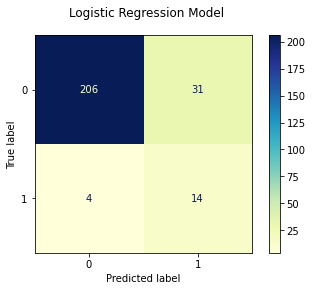

In [127]:
fig, ax = plt.subplots()

fig.suptitle("Logistic Regression Model")

plot_confusion_matrix(grid_search_LR, test_scaled, y_test, ax=ax, cmap="YlGnBu");

##### w/ resampling

In [131]:
# t1 = TomekLinks()
# X_train_tl, y_train_tl = tl.fit_resample(X_train, y_train)

sm = SMOTE(random_state = 42)
X_train_sm, y_train_sm = sm.fit_sample(train_scaled, y_train.ravel())

C = np.logspace(0, 1, 10)

params = dict(C=C, max_iter=[50, 100])

logistic = LogisticRegression(penalty='l2', class_weight='balanced', random_state=42)

grid_search_LR_sm = GridSearchCV(estimator = logistic,scoring=scorer, param_grid = params, 
                              cv = 3, n_jobs = -1, verbose = 2)
grid_search_LR_sm.fit(X_train_sm, y_train_sm)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished


GridSearchCV(cv=3,
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=42),
             n_jobs=-1,
             param_grid={'C': array([ 1.        ,  1.29154967,  1.66810054,  2.15443469,  2.7825594 ,
        3.59381366,  4.64158883,  5.9948425 ,  7.74263683, 10.        ]),
                         'max_iter': [50, 100]},
             scoring=make_scorer(recall_score, average=weighted), verbose=2)

In [132]:
lr_train_preds_sm = grid_search_LR_sm.best_estimator_.predict(X_train_sm)
lr_test_preds_sm = grid_search_LR_sm.best_estimator_.predict(test_scaled)
metrics_score(lr_train_preds_sm, y_train_sm, lr_test_preds_sm, y_test)

Training Accuracy:	0.9281 	Testing Accuracy:	0.8706
Training Precision:	0.9066 	Testing Precision:	0.3333
Training Recall:	0.9545 	Testing Recall:		0.8333
Training F1:		0.93 	Testing F1:		0.4762


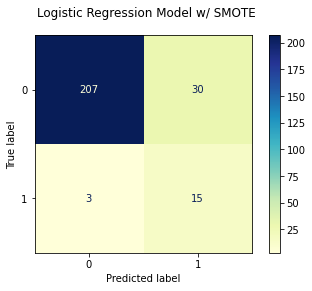

In [133]:
fig, ax = plt.subplots()

fig.suptitle("Logistic Regression Model w/ SMOTE")

plot_confusion_matrix(grid_search_LR_sm, test_scaled, y_test, ax=ax, cmap="YlGnBu");

In [ ]:
X_train_smt, y_train_smt

#### Random Forest GS Model w/ RFE Features

In [135]:
params = { 
    'n_estimators': [10, 25, 50, 100, 200, 500],
    'max_features': ['sqrt', 'auto', 'log2'],
    'max_depth' : [2,4,6,8,10,12,15,20],
    'criterion' :['gini', 'entropy']
}

rf = RandomForestClassifier(random_state = 42)

grid_search_RF = GridSearchCV(estimator=rf, param_grid=params, scoring=scorer, 
                              cv = 5, n_jobs = -1, verbose = 2)

In [136]:
grid_search_RF.fit(train_scaled, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   29.6s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  5.8min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 15, 20],
                         'max_features': ['sqrt', 'auto', 'log2'],
                         'n_estimators': [10, 25, 50, 100, 200, 500]},
             scoring=make_scorer(recall_score, average=weighted), verbose=2)

In [137]:
grid_search_RF.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'sqrt',
 'n_estimators': 10}

In [138]:
rf_train_preds = grid_search_RF.best_estimator_.predict(train_scaled)
rf_test_preds = grid_search_RF.best_estimator_.predict(test_scaled)
metrics_score(rf_train_preds, y_train, rf_test_preds, y_test)

Training Accuracy:	0.9646 	Testing Accuracy:	0.9412
Training Precision:	0.875 	Testing Precision:	0.6154
Training Recall:	0.5833 	Testing Recall:		0.4444
Training F1:		0.7 	Testing F1:		0.5161


Feature: 0, Score: 0.03110
Feature: 1, Score: 0.03358
Feature: 2, Score: 0.07455
Feature: 3, Score: 0.02836
Feature: 4, Score: 0.09464
Feature: 5, Score: 0.04786
Feature: 6, Score: 0.01895
Feature: 7, Score: 0.12568
Feature: 8, Score: 0.02253
Feature: 9, Score: 0.10869
Feature: 10, Score: 0.01810
Feature: 11, Score: 0.05349
Feature: 12, Score: 0.22757
Feature: 13, Score: 0.11489


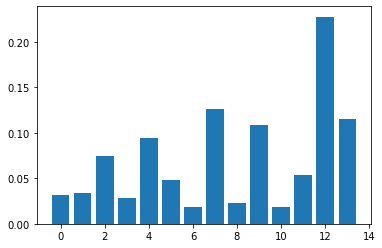

In [139]:
importance = grid_search_RF.best_estimator_.feature_importances_

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

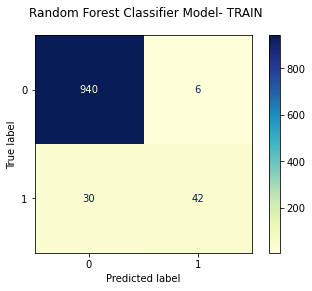

In [140]:
fig, ax = plt.subplots()

fig.suptitle("Random Forest Classifier Model- TRAIN")

plot_confusion_matrix(grid_search_RF, train_scaled, y_train, ax=ax, cmap="YlGnBu");

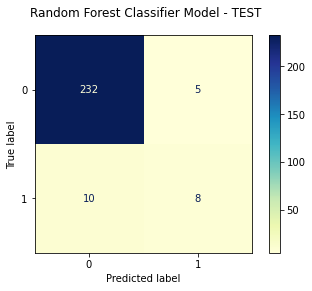

In [141]:
fig, ax = plt.subplots()

fig.suptitle("Random Forest Classifier Model - TEST")

plot_confusion_matrix(grid_search_RF, test_scaled, y_test, ax=ax, cmap="YlGnBu");

##### w/ SMOTE resampling

In [142]:
params = { 
    'n_estimators': [10, 25, 50, 100, 200, 500],
    'max_features': ['sqrt', 'auto', 'log2'],
    'max_depth' : [2,4,6,8,10,12,15,20],
    'criterion' :['gini', 'entropy']
}

rf = RandomForestClassifier(random_state = 42)

grid_search_RF_sm = GridSearchCV(estimator=rf, param_grid=params, scoring=scorer, 
                              cv = 5, n_jobs = -1, verbose = 2)

grid_search_RF_sm.fit(X_train_sm, y_train_sm)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 174 tasks      | elapsed:   36.7s
[Parallel(n_jobs=-1)]: Done 377 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 660 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 1025 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  8.7min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 15, 20],
                         'max_features': ['sqrt', 'auto', 'log2'],
                         'n_estimators': [10, 25, 50, 100, 200, 500]},
             scoring=make_scorer(recall_score, average=weighted), verbose=2)

In [143]:
grid_search_RF_sm.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'sqrt',
 'n_estimators': 500}

In [146]:
rf_train_preds_sm = grid_search_RF_sm.best_estimator_.predict(X_train_sm)
rf_test_preds_sm = grid_search_RF_sm.best_estimator_.predict(test_scaled)
metrics_score(rf_train_preds_sm, y_train_sm, rf_test_preds_sm, y_test)

Training Accuracy:	1.0 	Testing Accuracy:	0.9294
Training Precision:	1.0 	Testing Precision:	0.5
Training Recall:	1.0 	Testing Recall:		0.6667
Training F1:		1.0 	Testing F1:		0.5714


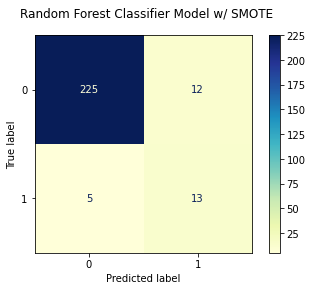

In [154]:
fig, ax = plt.subplots()

fig.suptitle("Random Forest Classifier Model w/ SMOTE")

plot_confusion_matrix(grid_search_RF_sm, test_scaled, y_test, ax=ax, cmap="YlGnBu");

## RFE w/ SMOTETomek

array([[ 0.94345433,  0.94742309,  0.39837264, ..., -0.22402731,
         0.97440729,  1.68911794],
       [ 0.09610248,  0.02265202, -0.22010545, ...,  0.8849818 ,
         0.53556221, -0.22106909],
       [-0.50047962, -0.72992031, -0.87600038, ..., -1.33303642,
        -1.59597107, -1.2822841 ],
       ...,
       [ 0.92877933,  0.89907236,  0.34921468, ..., -0.19162393,
         1.07826804,  1.68332998],
       [ 0.54145879,  0.38560983,  0.30593955, ...,  1.83556104,
         1.53969559,  1.52722661],
       [ 2.45079836,  3.09258702,  2.84895407, ...,  2.50377499,
         2.23616617,  5.80090006]])

In [60]:
# X_train_smt, y_train_smt

params = { 
    'n_estimators': [10, 25, 50, 100, 200, 500],
    'max_features': ['sqrt', 'auto', 'log2'],
    'max_depth' : [2,4,6,8,10,12,15,20],
    'criterion' :['gini', 'entropy']
}

rf = RandomForestClassifier(random_state = 42)

grid_search_RF = GridSearchCV(estimator=rf, param_grid=params, scoring=scorer, 
                              cv = 5, n_jobs = -1, verbose = 2)

grid_search_RF.fit(X_train_smt, y_train_smt)

# print(grid_search_RF.best_params_)

rf_train_preds = grid_search_RF.best_estimator_.predict(X_train_smt)
rf_test_preds = grid_search_RF.best_estimator_.predict(X_test_sc)
metrics_score(rf_train_preds, y_train_smt, rf_test_preds, y_test)


Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 170 tasks      | elapsed:   48.2s
[Parallel(n_jobs=-1)]: Done 373 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 656 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 1021 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed: 14.4min finished


Training Accuracy:	0.9958 	Testing Accuracy:	0.9255
Training Precision:	0.9916 	Testing Precision:	0.4762
Training Recall:	1.0 	Testing Recall:		0.5556
Training F1:		0.9958 	Testing F1:		0.5128


#### Decision Tree GS w/ RFE 

In [147]:
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]

params = dict(criterion=['gini', 'entropy'],
                max_depth=[2,4,6,8,10,12,15,20,25],
                 splitter = ['best', 'random'],
             )

DT = tree.DecisionTreeClassifier(random_state = 42, class_weight = 'balanced')

grid_search_DT = GridSearchCV(estimator=DT, param_grid=params, scoring=scorer, 
                              cv = 5, n_jobs = -1, verbose = 2)

In [148]:
grid_search_DT.fit(train_scaled, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    1.4s finished


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 15, 20, 25],
                         'splitter': ['best', 'random']},
             scoring=make_scorer(recall_score, average=weighted), verbose=2)

In [149]:
grid_search_DT.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'splitter': 'best'}

In [150]:
dt_train_preds = grid_search_DT.best_estimator_.predict(train_scaled)
dt_test_preds = grid_search_DT.best_estimator_.predict(test_scaled)
metrics_score(dt_train_preds, y_train, dt_test_preds, y_test)

Training Accuracy:	0.9833 	Testing Accuracy:	0.9059
Training Precision:	0.809 	Testing Precision:	0.3929
Training Recall:	1.0 	Testing Recall:		0.6111
Training F1:		0.8944 	Testing F1:		0.4783


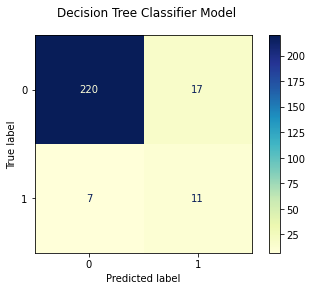

In [151]:
fig, ax = plt.subplots()

fig.suptitle("Decision Tree Classifier Model")

plot_confusion_matrix(grid_search_DT, test_scaled, y_test, ax=ax, cmap="YlGnBu");

##### w/ SMOTE

In [153]:
params = dict(criterion=['gini', 'entropy'],
                max_depth=[2,4,6,8,10,12,15,20,25],
                 splitter = ['best', 'random'],
             )

DT = tree.DecisionTreeClassifier(random_state = 42, class_weight = 'balanced')


grid_search_DT_sm = GridSearchCV(estimator=DT, param_grid=params, scoring=scorer, 
                              cv = 5, n_jobs = -1, verbose = 2)

grid_search_DT_sm.fit(X_train_sm, y_train_sm)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    1.4s finished


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 15, 20, 25],
                         'splitter': ['best', 'random']},
             scoring=make_scorer(recall_score, average=weighted), verbose=2)

In [154]:
grid_search_DT_sm.best_params_

{'criterion': 'entropy', 'max_depth': 12, 'splitter': 'best'}

In [156]:
dt_train_preds_sm = grid_search_DT_sm.best_estimator_.predict(X_train_sm)
dt_test_preds_sm = grid_search_DT_sm.best_estimator_.predict(test_scaled)
metrics_score(dt_train_preds_sm, y_train_sm, dt_test_preds_sm, y_test)

Training Accuracy:	0.9974 	Testing Accuracy:	0.8824
Training Precision:	1.0 	Testing Precision:	0.3125
Training Recall:	0.9947 	Testing Recall:		0.5556
Training F1:		0.9974 	Testing F1:		0.4


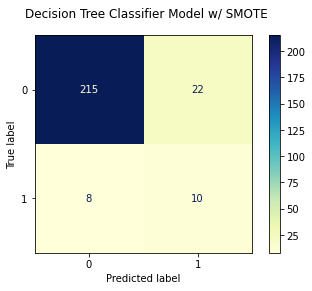

In [157]:
fig, ax = plt.subplots()

fig.suptitle("Decision Tree Classifier Model w/ SMOTE")

plot_confusion_matrix(grid_search_DT_sm, test_scaled, y_test, ax=ax, cmap="YlGnBu");

#### KNN GS w/ RFE Features

In [176]:
knn = KNeighborsClassifier()
params = {
    'n_neighbors': [3,5,11,15,19],
    'weights': ['uniform', 'distance'],
    'metric': ['eucilidean', 'manhattan', 'minkowski']
}

grid_knn = GridSearchCV(knn, params, verbose = 1,
                        cv = 3, n_jobs =-1)

In [177]:
grid_knn.fit(train_scaled, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    4.6s finished


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['eucilidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 11, 15, 19],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [178]:
grid_knn.best_params_

{'metric': 'minkowski', 'n_neighbors': 11, 'weights': 'uniform'}

In [179]:
knn_train_preds = grid_knn.best_estimator_.predict(train_scaled)
knn_test_preds = grid_knn.best_estimator_.predict(test_scaled)
metrics_score(knn_train_preds, y_train, knn_test_preds, y_test)

Training Accuracy:	0.944 	Testing Accuracy:	0.9451
Training Precision:	0.9356 	Testing Precision:	0.9371
Training Recall:	0.944 	Testing Recall:		0.9451
Training F1:		0.9335 	Testing F1:		0.9377


##### KNN w/ resampling

In [181]:
knn = KNeighborsClassifier()
params = {
    'n_neighbors': [3,5,11,15,19],
    'weights': ['uniform', 'distance'],
    'metric': ['eucilidean', 'manhattan', 'minkowski']
}

grid_knn_sm = GridSearchCV(knn, params, verbose = 1,
                        cv = 3, n_jobs =-1)

grid_knn_sm.fit(X_train_res, y_train_res)

print(grid_knn_sm.best_params_)

knn_train_preds_sm = grid_knn_sm.best_estimator_.predict(X_train_res)
knn_test_preds_sm = grid_knn_sm.best_estimator_.predict(test_scaled)
metrics_score(knn_train_preds_sm, y_train_res, knn_test_preds_sm, y_test)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


{'metric': 'minkowski', 'n_neighbors': 3, 'weights': 'distance'}
Training Accuracy:	1.0 	Testing Accuracy:	0.8941
Training Precision:	1.0 	Testing Precision:	0.9345
Training Recall:	1.0 	Testing Recall:		0.8941
Training F1:		1.0 	Testing F1:		0.9091


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.0s finished


### PCA

In [43]:
pca = PCA(n_components= .9, random_state=42)

pca_train = pca.fit_transform(X_train)
pca_test = pca.transform(X_test)

In [44]:
pca.n_components_

2

In [34]:
pca_result = pca.fit_transform(X_train)
pca1 = pca_result[:,0]
pca2 = pca_result[:,1] 


target = pd.Categorical(y_train).codes

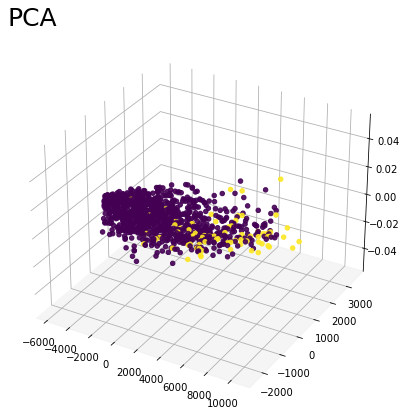

In [36]:
fig = plt.figure(figsize=(19, 7))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.set_title('PCA', fontsize=25, loc='left')
ax.scatter(xs=pca1, 
           ys=pca2, 
#            zs=pca3, 
           c=target,
           alpha=.9,)

ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
# ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))


In [97]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, f1_score, recall_score, confusion_matrix, classification_report, make_scorer
from sklearn.decomposition import PCA
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import tree 
from xgboost import XGBClassifier
from lightgbm import LGBMRegressor, LGBMClassifier, Booster
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score, confusion_matrix,\
recall_score, precision_score, accuracy_score, log_loss,\
roc_curve, roc_auc_score, classification_report,plot_confusion_matrix
from sklearn.feature_selection import RFE, RFECV


In [98]:
RF = RandomForestClassifier(random_state = 42)
rfe = RFECV(estimator = DT, step =1, cv = 3, scoring = 'recall', n_jobs = -1, verbose = 1)
rfe = rfe.fit(X_train, y_train)
# print summaries for the selection of attributes
print(rfe.support_)
print(rfe.ranking_)


Fitting estimator with 133 features.
Fitting estimator with 132 features.
Fitting estimator with 131 features.
Fitting estimator with 130 features.
Fitting estimator with 129 features.
Fitting estimator with 128 features.
Fitting estimator with 127 features.
Fitting estimator with 126 features.
Fitting estimator with 125 features.
Fitting estimator with 124 features.
Fitting estimator with 123 features.
Fitting estimator with 122 features.
Fitting estimator with 121 features.
Fitting estimator with 120 features.
Fitting estimator with 119 features.
Fitting estimator with 118 features.
Fitting estimator with 117 features.
Fitting estimator with 116 features.
Fitting estimator with 115 features.
Fitting estimator with 114 features.
Fitting estimator with 113 features.
Fitting estimator with 112 features.
Fitting estimator with 111 features.
Fitting estimator with 110 features.
Fitting estimator with 109 features.
Fitting estimator with 108 features.
Fitting estimator with 107 features.
F

In [102]:
selected_rfe = X_train[rfe_features].columns[selector.support_]

NameError: name 'rfe_features' is not defined

In [100]:
feat_import = {name: score 
                   for name, score 
                               in zip(X_test.columns, RF.feature_importances_)}
feat_import

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [70]:
# create function to call for evaluation of each model

def metrics_score(train_preds, y_train, test_preds, y_test):
    print(f"Training Accuracy:\t{accuracy_score(y_train, train_preds):.4}",
          f"\tTesting Accuracy:\t{accuracy_score(y_test, test_preds):.4}")
    print(f"Training Precision:\t{precision_score(y_train, train_preds, average='weighted'):.4}",
          f"\tTesting Precision:\t{precision_score(y_test, test_preds, average='weighted'):.4}")
    print(f"Training Recall:\t{recall_score(y_train, train_preds, average='weighted'):.4}",
          f"\tTesting Recall:\t\t{recall_score(y_test, test_preds, average='weighted'):.4}")
    print(f"Training F1:\t\t{f1_score(y_train, train_preds, average='weighted'):.4}",
          f"\tTesting F1:\t\t{f1_score(y_test, test_preds, average='weighted'):.4}")

In [101]:
rf_train_preds = rfe.predict(X_train)
rf_test_preds = rfe.predict(X_test)
metrics_score(rf_train_preds, y_train, rf_test_preds, y_test)

Training Accuracy:	1.0 	Testing Accuracy:	0.9412
Training Precision:	1.0 	Testing Precision:	0.9344
Training Recall:	1.0 	Testing Recall:		0.9412
Training F1:		1.0 	Testing F1:		0.9367


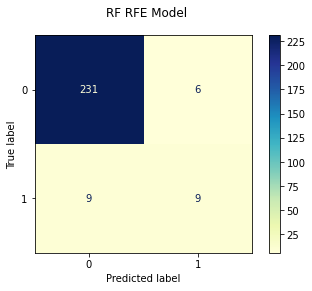

In [68]:
fig, ax = plt.subplots()

fig.suptitle("RF RFE Model")

plot_confusion_matrix(rfe, X_test, y_test, ax=ax, cmap="YlGnBu");

In [54]:
RF2 = RandomForestClassifier(random_state = 42)
RF2.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [55]:
rf_train_preds = RF2.predict(X_train)
rf_test_preds = RF2.predict(X_test)
metrics_score(rf_train_preds, y_train, rf_test_preds, y_test)

Training Accuracy:	1.0 	Testing Accuracy:	0.9373
Training Precision:	1.0 	Testing Precision:	0.9312
Training Recall:	1.0 	Testing Recall:		0.9373
Training F1:		1.0 	Testing F1:		0.9336


In [81]:
knn = KNeighborsClassifier(n_neighbors=7, weights = 'distance')
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7, weights='distance')

In [82]:

cross_val_score(knn, X_train, y_train, cv=5)

array([0.93137255, 0.92156863, 0.93137255, 0.9408867 , 0.93596059])

In [83]:
knn_train_preds = knn.predict(X_train)
knn_test_preds = knn.predict(X_test)
metrics_score(rf_train_preds, y_train, rf_test_preds, y_test)

Training Accuracy:	1.0 	Testing Accuracy:	0.949
Training Precision:	1.0 	Testing Precision:	0.9455
Training Recall:	1.0 	Testing Recall:		0.949
Training F1:		1.0 	Testing F1:		0.9469


In [84]:
df['target'].mean()

0.07069913589945012

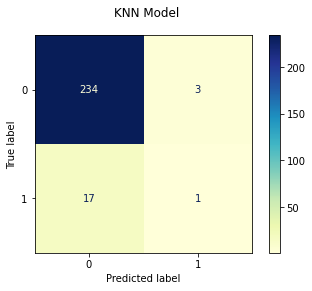

In [85]:
fig, ax = plt.subplots()

fig.suptitle("KNN Model")

plot_confusion_matrix(knn, X_test, y_test, ax=ax, cmap="YlGnBu");